# Kernelized Support Vector Machines

- Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space.
- SVC for classification
- SVR for regression

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split

---

## Linear models and Nonlinear Features

Linear models is quite limitting in low dimensional spaces, another way to make for flexible is by adding more features, ex: adding interactions or polynomials of the input features.

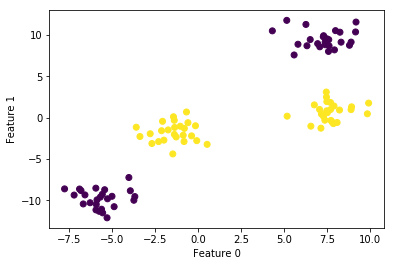

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

Liner models for classification only can separate it using line.

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


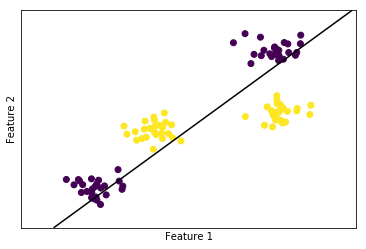

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [11]:
# add the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

In [7]:
X_new.shape

(100, 3)

In [9]:
X.shape

(100, 2)

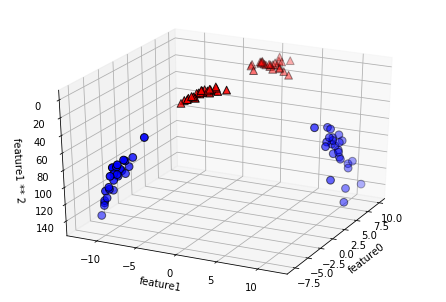

In [13]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
            cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
            cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


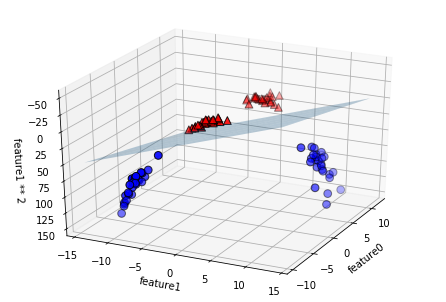

In [16]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
            cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
            cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

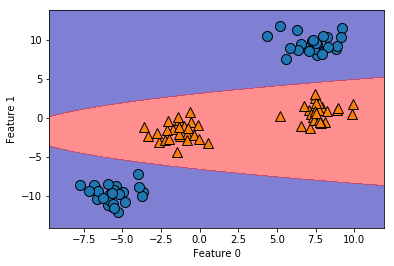

In [18]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
                cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

## The Kernel Trick

- Adding non linear features can make linear models much more powerful.
- Oftenly we don't know which features to add and adding more features might make computations very expensive. Kernel trick to the rescue to solve the problem.
- Kernel trick works by directly computing the distance (scalar products) of the data points for the expanded feature representation, without actually computing the expansion.
- Two ways commonly used with support vector machines: 
    - The polynomial kernel: computes all possible polynomial up to a certain degree of the original features.
    - Radial basis function (RBF) kernel, or gaussian kernel.
        - It considers all possible polynomial of all degrees, but the importance of the features decreases for higher degrees.

## Understanding SVMs

- During training, SVM learns how important each of the training data points is to represent the decision boundary.
- Only a subset that matters, the one that lies close to the decision boundary. These subset are called support vectors.
- To make prediction, the distance to each support vector is measured.
- The importance support vectors are stored in dual_coef_ attribute.
- The distance are calculated by the Gaussian kernel. 
    - krbf(x1, x2) = exp (–ɣǁx1 - x2ǁ2)
    - ǁx1 - x2ǁ denotes distance
    - gamma is a parameter that controls the width of the gaussian kernel

Text(0, 0.5, 'Feature 1')

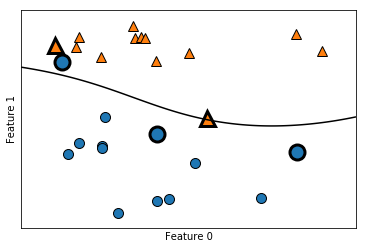

In [19]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Tuning SVM Parameters

- Gamma parameter determines how far the influence of a single training example reaches, with low values meaning corresponding to a far reach, and high values to a limited reach.
- The wider the radius of gaussian kernel, the further the influence of each training example.
- C paramter is the regularization parameter, it limits the importance of each point.

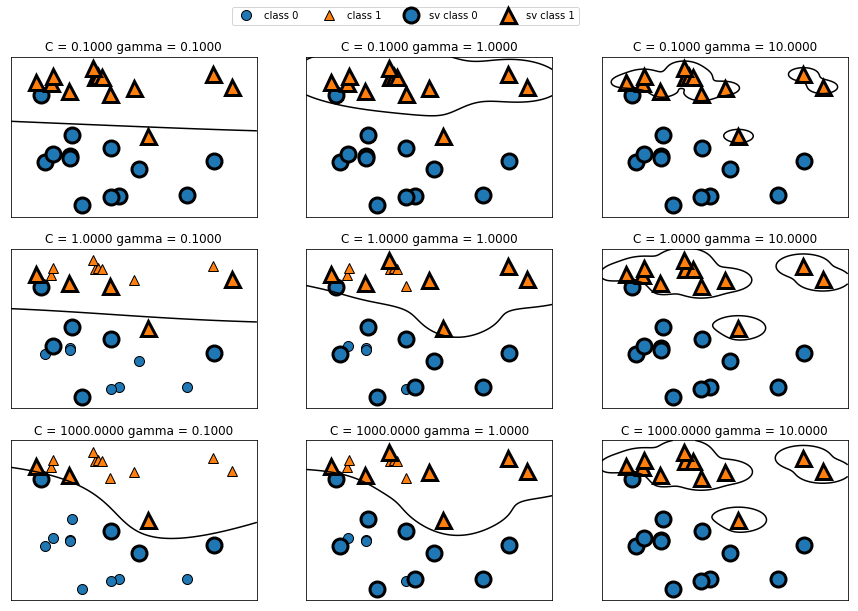

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                    ncol=4, loc=(.9, 1.2))

- From left to right: We increase the value of gamma.
    - Small gamma -> large radius for the gaussian kernel, which means that many points are considered close by. -> smooth decision boudaries and boundary get more focus on the right. Low model complexity.
    - Large gamma -> High model complexity.
- From top to bottom: We increase the value of C.
    - Small C -> very restricted model. each training points only have limited influence -> low complexity.
    - Large C -> high complexity.
- Default:
    - C = 1 and gamma=1/n_features

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

In [22]:
svc = SVC().fit(X_train, y_train)

print("Accuracy on training set: {}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.6293706293706294


C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- High score for training set and low score for test set, an indication of overfit model.
- SVs are very sensitive to parameters tuning and to the scaling of the data. 
- They require all the features to vary on a similar scale.

Text(0, 0.5, 'Feature magnitude')

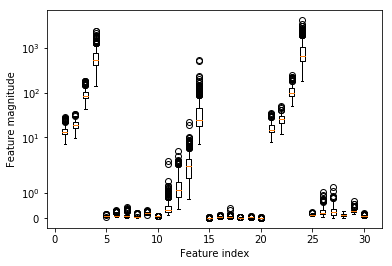

In [23]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale('symlog')
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

Scaling is a problem for linear models, and devastating effect for SVM.

## Preprocessing Data for SVMs

Now, we perform scaling in a conventional way:
(implemented by MinMaxScaler)

In [30]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [31]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [33]:
svc = SVC().fit(X_train_scaled, y_train)

print("Accuracy on training set: {}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.9483568075117371
Accuracy on test set: 0.951048951048951


C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- Scaling makes a huge difference
- Since score for training set and test set are close, it is an indication that the model is underfitting.

In [34]:
svc = SVC(C=1000).fit(X_train_scaled, y_train)

print("Accuracy on training set: {}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.972027972027972


C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Strengths, Weaknesses, and Parameters

- Strenghts:
    - Powerful model and performs well on a variety of datasets
    - Allows complex decision boundaries.
    - Works well on high dimensional or low dimensional data.
    - Works well if features use the same unit.
- Weaknesses:
    - Don't scale very well with the number of samples.
    - Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.
    - Require scaling and careful parameters tuning.
    - Hard to inspect, difficult to understand why a particular prediction was made.
- Parameters:
    - C: regularization parameter
    - Kernel
    - Kernel-specific parameter
    - For rbf, the kernel-specific parameter is gamma: the inverse of the width of the gaussian kernel.
    - Large value for C and gamma -> more complex model.
    - These parameters are strongly related.
- Another Points:

---

# Important Points

- Good for low dimensional or high dimensional data.
- Bad for not scaled dataset
- Sensitive to parameters tuning.
- SVC for classification.
- SVR for regression.